### bisection methods

This implementation does not create a sequence of values which converge, but rather returns an approximate value within $\epsilon$ of the true root.

In [6]:
import numpy

def bisect(f, a, b, eps, Nmax):
    while b - a > eps and N < Nmax:
        if sign(f((a+b)/2)) == sign(f(b)):
            b = (a+b)/2
        else:
            a = (a+b)/2
        N += 1
    return (a+b)/2

In [8]:
f(x) = x^2 - 3
print f(1), f(2)

-2 1


In [9]:
bisect(f, 1, 2, 0.001)

3547/2048

In [25]:
# verifying
bool(
    n(sqrt(3)) - bisect(f,1,2,0.001) <= 0.001
)

True

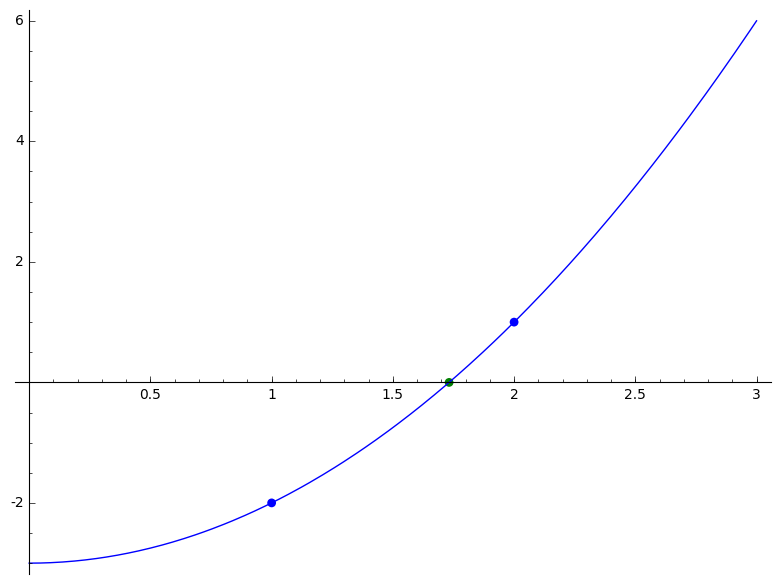

In [24]:
a = 1
b = 2
f(x) = x^2 - 3
eps = 0.001

r = bisect(f, a, b, eps)

crv = plot(f, (x, 0, 3))
pts = point([(1,f(1)),(2,f(2))], pointsize = 40)
root = point((r, f(r)), pointsize = 40, color = 'green')
show(crv + pts + root)

### table for convergence analysis

Suppose $f \colon [a,b] \to \mathbf{R}$ is a continuous function with $f(a)\cdot f(b)< 0$. By the IVT there's a root $p \in (a,b)$ such that $f(x) = 0$.

We'll write an algorithm to generate a sequence $x_n$ such that $x_n \to x$. 

But at what rate $O(\beta_n)$ does $x_n \to x$? 
That is, for what seqs $\beta_n \to 0$ does there exist a positive constant $\lambda$ such that 
$$x_n - x \leq \lambda|\beta_n|?$$ 
I'd guess the fastest converging $\beta_n$ is $\frac1n$.

What's the order of this algorithm's convergence? (Likely linear.) 
That is, for what $\alpha > 0$ does there exist an asymptotic error constant $\lambda > 0$ such that 
$$\lim_{n\to \infty} \frac{|e_{n+1}|}{|e_n|^\alpha} = \lambda ?$$

In [39]:
import numpy

def bisect_verbose(f, a, b, Nmax, root):
    n = 0
    values = []
    while n < Nmax:
        x = (a + b)/2
        error = abs(root - x)
        values.append([n, a, b, x, f(x), error])
        if f(x)*f(a) < 0:
            b = x
        else:
            a = x           
        n = n + 1
    return values

In [40]:
f(x) = x^2 - 3
root = N(sqrt(3))
Nmax = 10

bisect_verbose(f, 1, 2, Nmax, root)

[[0, 1, 2, 3/2, -3/4, 0.232050807568877],
 [1, 3/2, 2, 7/4, 1/16, 0.0179491924311228],
 [2, 3/2, 7/4, 13/8, -23/64, 0.107050807568877],
 [3, 13/8, 7/4, 27/16, -39/256, 0.0445508075688772],
 [4, 27/16, 7/4, 55/32, -47/1024, 0.0133008075688772],
 [5, 55/32, 7/4, 111/64, 33/4096, 0.00232419243112281],
 [6, 55/32, 111/64, 221/128, -311/16384, 0.00548830756887719],
 [7, 221/128, 111/64, 443/256, -359/65536, 0.00158205756887719],
 [8, 443/256, 111/64, 887/512, 337/262144, 0.000371067431122807],
 [9, 443/256, 887/512, 1773/1024, -2199/1048576, 0.000605495068877193]]

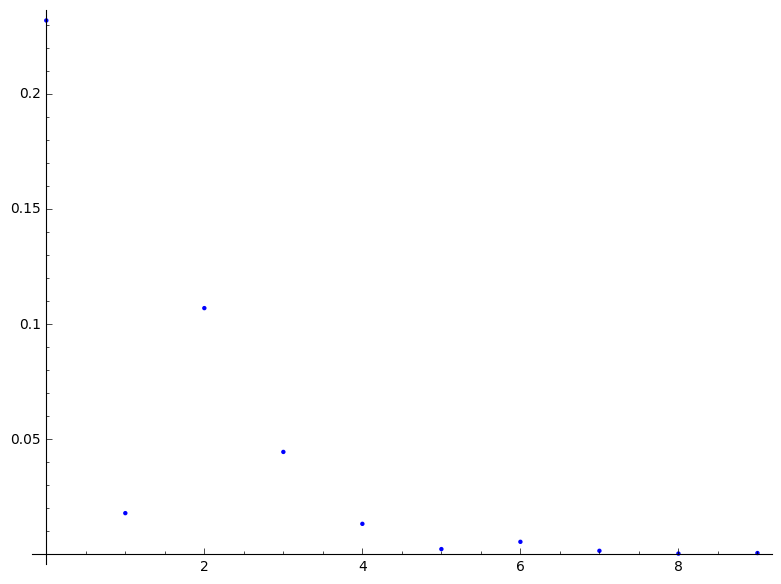

In [43]:
# plot the error
error_seq = [bisect_verbose(f, 1, 2, Nmax, root)[i][5] for i in range(Nmax)]
list_plot(error_seq) 

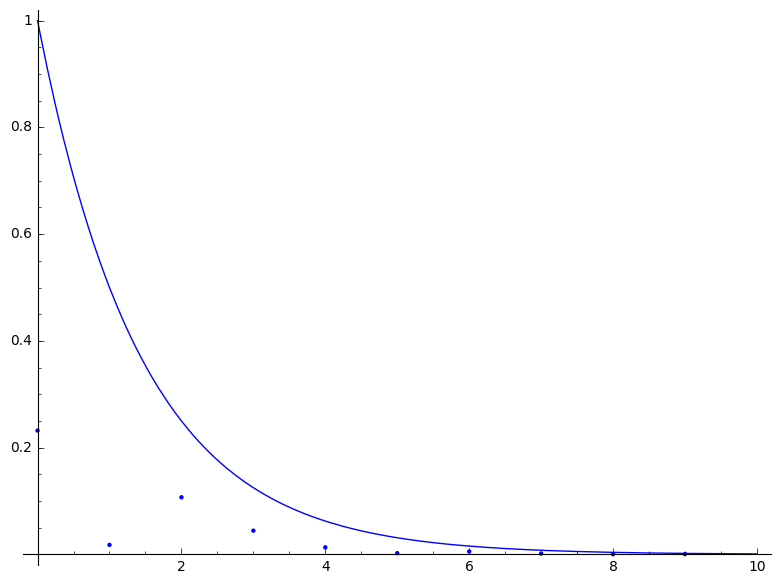

In [44]:
# bounded by 1/(2^n)?
list_plot(error_seq) + plot(1/(2^x), (x, 0, Nmax))

### multiplicity

A root $p$ of the equation $f(x) = 0$ is said to be a *root of multiplicity* $m$ iff $f$ "can be written of the form" $$f(x) = (x - p)^m q(x)$$ where $\lim_{x \to p} q(x) \neq 0$.

Rather than factoring, we can take derivatives.

Let $f$ be a cts func with $m$ cts derivs; the eqn $f(x) = 0$ has a root of multip $m$ at $x = p$ iff $$\{f^{(n)}(p) : 0 \leq n < m\} = \{0\}$$ with $$f^{(m)}(p) \neq 0$$ i.e. at $x = p$ all derivs of $f$ upto the $m$th are zero but the $m$th is *nonzero*.

Consider non-poly funcs, for example, the log of a rational func: 

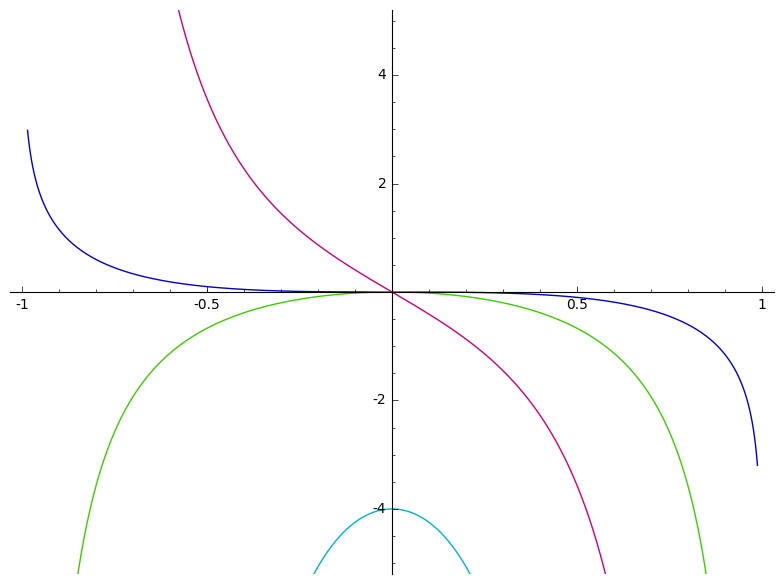

In [7]:
f(x) = 2*x + log((1-x)/(1+x))
plot([f.diff(x,n) for n in range(4)], (x, -1, 1), ymax = 5, ymin = -5)

In [5]:
for n in range(4):
    print str(n)+"th derivative"
    show(f.diff(x, n))

0th derivative


x |--> 2*x + log(-(x - 1)/(x + 1))

1th derivative


x |--> (x + 1)*(1/(x + 1) - (x - 1)/(x + 1)^2)/(x - 1) + 2

2th derivative


x |--> -2*(x + 1)*(1/(x + 1)^2 - (x - 1)/(x + 1)^3)/(x - 1) - (x + 1)*(1/(x + 1) - (x - 1)/(x + 1)^2)/(x - 1)^2 + (1/(x + 1) - (x - 1)/(x + 1)^2)/(x - 1)

3th derivative


x |--> 6*(x + 1)*(1/(x + 1)^3 - (x - 1)/(x + 1)^4)/(x - 1) + 4*(x + 1)*(1/(x + 1)^2 - (x - 1)/(x + 1)^3)/(x - 1)^2 - 4*(1/(x + 1)^2 - (x - 1)/(x + 1)^3)/(x - 1) + 2*(x + 1)*(1/(x + 1) - (x - 1)/(x + 1)^2)/(x - 1)^3 - 2*(1/(x + 1) - (x - 1)/(x + 1)^2)/(x - 1)^2